In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

import seaborn
import plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff


##############  OFFLINE  ##############
plotly.offline.init_notebook_mode(connected=True)
#to plot offline: ##plotly.offline.iplot##

##############  ONLINE  ##############
#plotly.tools.set_credentials_file(username='arnaurovira23', api_key='7y46ugRJ8Rl6XCkCwBGM')
#to plot online: ##py.iplot##
import plotly.plotly as py

import warnings
warnings.filterwarnings('ignore')

### target dataset

In [2]:
df_target = pd.read_csv('train_lables.txt')
df_target.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [3]:
print(f' How many unique values are in target column? {len(df_target.heart_disease_present.unique())}')
df_target['heart_disease_present'].unique()

 How many unique values are in target column? 2


array([0, 1])

In [4]:
#Shape of target dataset
num_target = df_target.shape[0]
print(num_target)

180


### train dataset

In [5]:
df_train = pd.read_csv('train_values.txt')
df_train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [6]:
df_train.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [7]:
#Shape of train dataset
num_train = df_train.shape[0]
print(f' Shpae of dataset train: {num_train}')

 Shpae of dataset train: 180


##### features

In [8]:
features_all = df_train.columns.tolist()
features_all.remove('patient_id')
print(features_all)
print(len(features_all))

['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']
13


In [9]:
print(f'How many NaN values are in df_train set? {df_train.isnull().sum().sum()}')

How many NaN values are in df_train set? 0


In [10]:
print(f'How many unique values are in thal column? {len(df_train.thal.unique())}')
print(df_train['thal'].unique())

How many unique values are in thal column? 3
['normal' 'reversible_defect' 'fixed_defect']


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


### test dataset

In [12]:
df_test = pd.read_csv('test_values.txt')
df_test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [13]:
#Shape of test dataset
num_test = df_test.shape[0]
print(f' Shpae of dataset test: {num_test}')

 Shpae of dataset test: 90


In [14]:
df_test.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.655556,131.411111,3.211111,0.622222,0.122222,0.966667,250.555556,1.130000,0.655556,53.677778,150.066667,0.355556
std,0.602637,19.552806,0.977206,0.894148,0.329377,0.999438,49.835936,1.193847,0.477849,8.641197,25.351817,0.481363
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,166.000000,0.000000,0.000000,34.000000,71.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,212.250000,0.000000,0.000000,46.250000,136.500000,0.000000
50%,2.000000,130.000000,4.000000,0.000000,0.000000,0.000000,243.500000,0.800000,1.000000,54.000000,156.500000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,274.750000,1.875000,1.000000,60.000000,164.750000,1.000000
max,3.000000,200.000000,4.000000,3.000000,1.000000,2.000000,409.000000,4.000000,1.000000,76.000000,195.000000,1.000000


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
patient_id                              90 non-null object
slope_of_peak_exercise_st_segment       90 non-null int64
thal                                    90 non-null object
resting_blood_pressure                  90 non-null int64
chest_pain_type                         90 non-null int64
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null int64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null int64
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null int64
exercise_induced_angina                 90 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 9.9+ KB


In [16]:
print(f'How many NaN values are in df_test set? {df_test.isnull().sum().sum()}')

How many NaN values are in df_test set? 0


In [17]:
print(f'How many unique values are in thal column? {len(df_test.thal.unique())}')
print(df_test['thal'].unique())

How many unique values are in thal column? 3
['reversible_defect' 'normal' 'fixed_defect']


In [18]:
features_all_test = df_test.columns.tolist()
features_all_test.remove('patient_id')
print(features_all_test)
print(len(features_all_test))

['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']
13


### merge train & target dataset

In [19]:
df_final = df_train.merge(df_target, on = 'patient_id' , how = 'left')
df_final.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [20]:
df_final.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

##### features dataset final

In [21]:
df_final['heart_disease_present'].value_counts()
targets = df_final['heart_disease_present'].unique()
num_targets = len(targets)
print(targets)
print(num_targets)

[0 1]
2


In [22]:
features_num = df_final.select_dtypes(include=['int64','float']).columns.to_list()
features_num.remove('heart_disease_present')
print(features_num)
print(len(features_num))

['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']
12


In [23]:
df_final['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [24]:
targets_plot = [go.Bar(y = df_final['heart_disease_present'].value_counts(),\
                     marker = dict(color = ['rgba(204,204,204,1)', 'rgba(222,45,38,0.8)']))]

layout = go.Layout(title='heart_disease_present Count',width=400, height=400, xaxis= dict(dtick=1))
fig = go.Figure(targets_plot, layout=layout)
plotly.offline.iplot(fig)

### Train vs test comparision

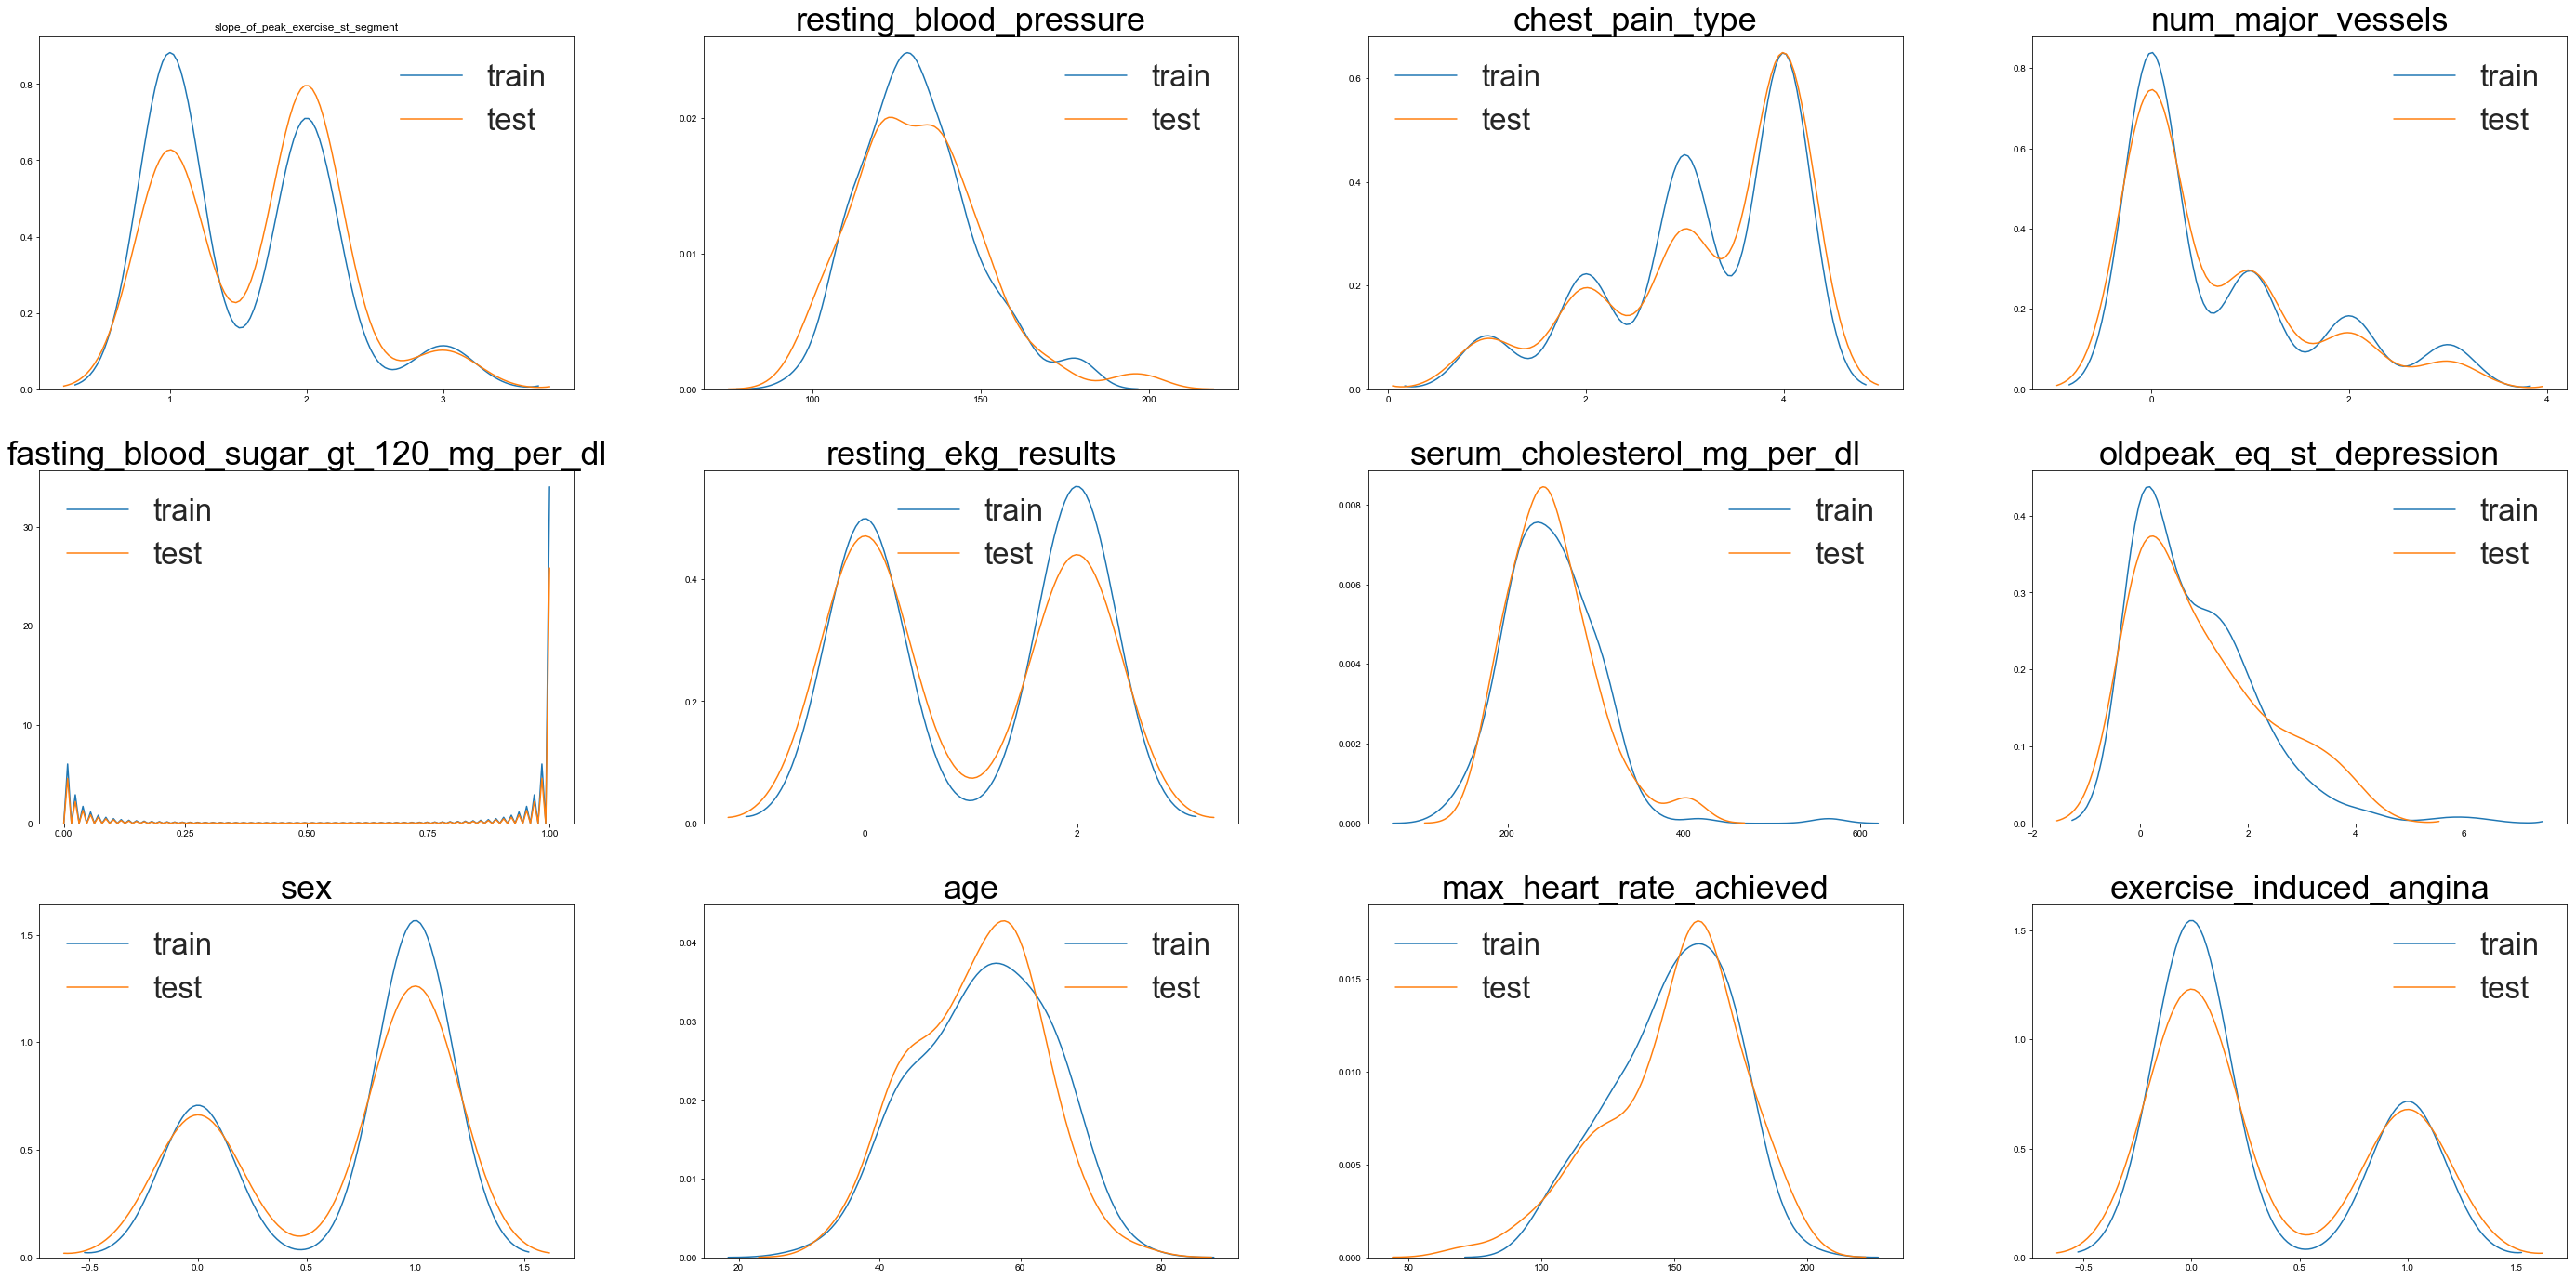

In [25]:
fig, axs = plt.subplots(3, 4, figsize=(40, 20))
axs = axs.flatten()
    
for i, (ax, feature) in enumerate(zip(axs, features_num)):
    sns.kdeplot(df_train[feature], label="train", ax=ax)
    sns.kdeplot(df_test[feature], label="test", ax=ax)
    ax.set_title(feature)
    sns.set(font_scale=3) 
    sns.set_style("ticks")
    ax.legend(frameon=False)
plt.tight_layout()

# EDA

In [26]:
features_count = ['resting_ekg_results','slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','sex','exercise_induced_angina']
features_kde = [ 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved']

In [1]:
fig, axs = plt.subplots(ncols = 5, figsize=(20, 6))
axs = axs.flatten()
    
for i, (ax, feature) in enumerate(zip(axs, features_kde)):
    sns.kdeplot(df_final[df_final['heart_disease_present']==0][feature], label = 0, ax=ax)
    sns.kdeplot(df_final[df_final['heart_disease_present']==1][feature], label = 1, ax=ax)
    ax.set_title(feature)
    sns.set(font_scale=1.5) 
    sns.set_style("ticks")
    ax.legend(frameon=False)
    
plt.tight_layout()

NameError: name 'plt' is not defined

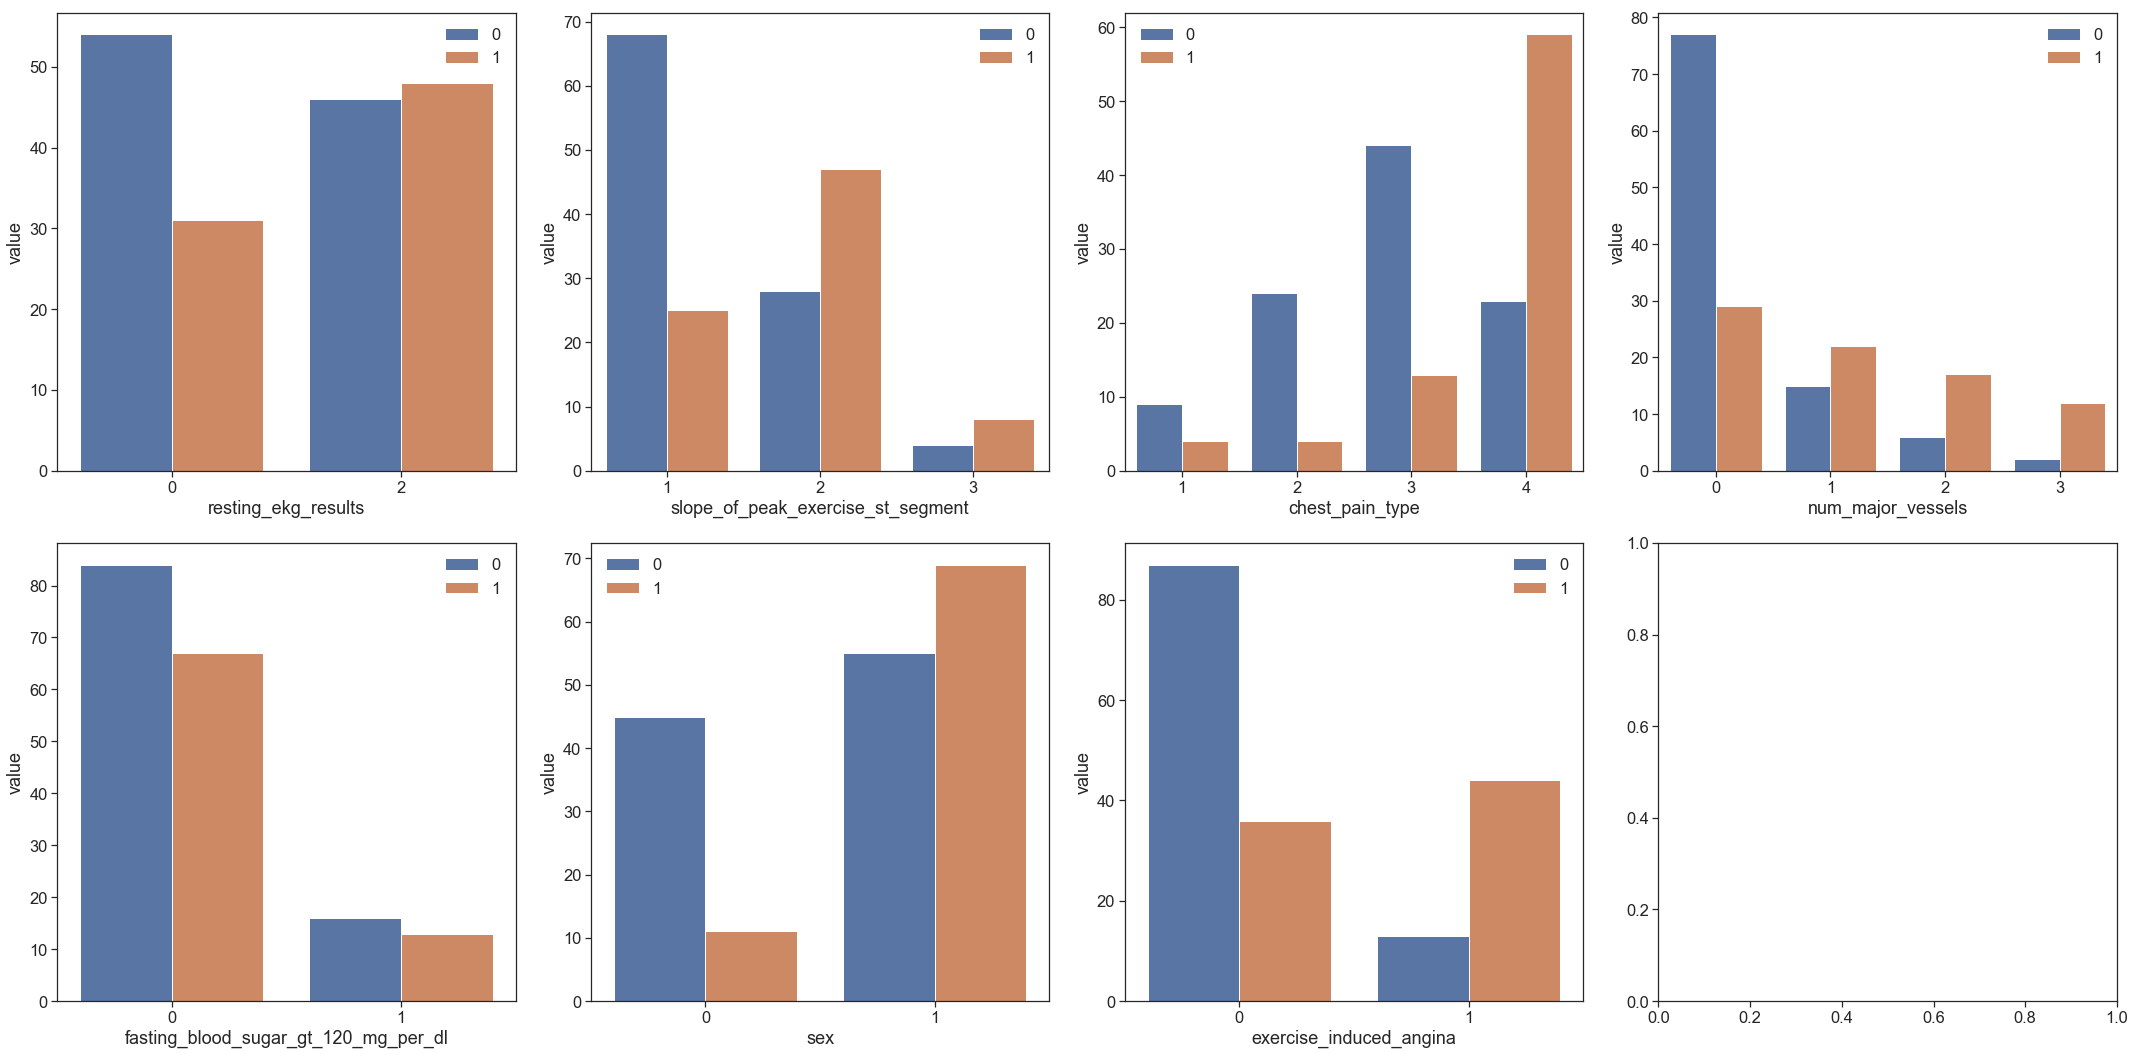

In [28]:
fig, axs = plt.subplots(2,4,figsize=(30,15))
axs = axs.flatten()

for i,(ax, feature) in enumerate (zip(axs, features_count)):
    gb_0 = df_final[[feature, 'heart_disease_present']][df_final['heart_disease_present'] == 0].groupby(feature).count().rename(columns = {'heart_disease_present':'0'})
    gb_1 = df_final[[feature, 'heart_disease_present']][df_final['heart_disease_present'] == 1].groupby(feature).count().rename(columns = {'heart_disease_present':'1'})
    gb_plot = gb_0.merge(gb_1, on = feature).reset_index()
    gb_plot = pd.melt(gb_plot, id_vars = feature, value_vars=['0','1']).rename(columns = {'variable':'heart_disease_present'})
    sns.barplot(data = gb_plot, x = feature , y='value' ,hue = 'heart_disease_present', ax = ax)
    sns.set(font_scale=1.5) 
    sns.set_style("ticks")
    ax.legend(frameon=False)
    
plt.tight_layout()

### combine target and test set

In [29]:
df_combine = pd.concat([df_final, df_test], sort = False)
len_train = df_train.shape[0]
len_test = df_test.shape[0]

### dummies EDA

In [30]:
feature_dummies = ['thal_fixed_defect','thal_normal','thal_reversible_defect']

In [31]:
df_combine = pd.get_dummies(df_combine, columns = ['thal'])

In [32]:
df_final[['thal','heart_disease_present']].groupby('thal').mean()

,heart_disease_present
thal,
fixed_defect,0.500000
normal,0.204082
reversible_defect,0.756757


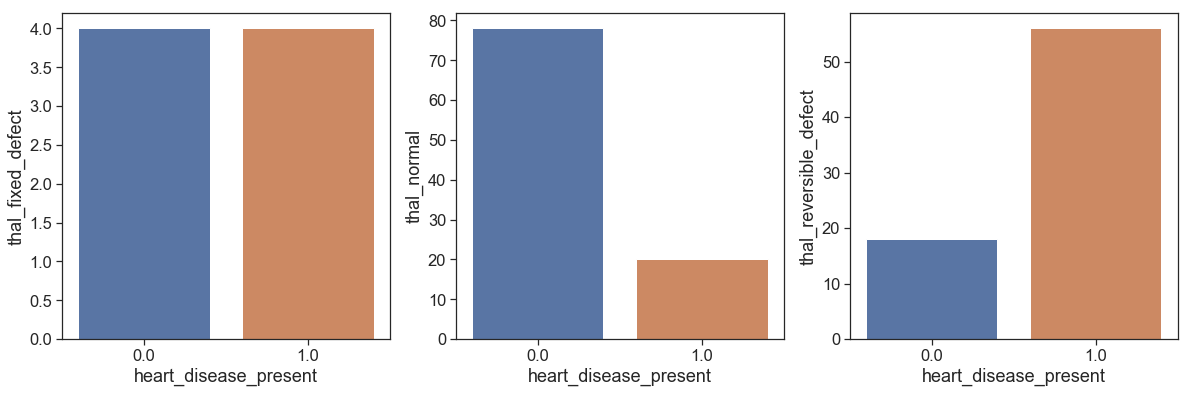

In [33]:
fig, axs = plt.subplots(figsize=(20,6),ncols=3)
for i,feature in enumerate (feature_dummies):
    count = df_combine[:len_train][[feature,'heart_disease_present']].groupby('heart_disease_present').sum().reset_index()
    sns.barplot(data = count, x = 'heart_disease_present', y = feature, ax = axs[i])
    sns.set(font_scale=1) 
    sns.set_style("ticks")

# Feature engineering

##### Dummies

In [34]:
df_combine = pd.get_dummies(df_combine, columns=['slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels'])
df_combine.head()

,patient_id,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,...,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3
0,0z64un,128,0,2,308,0.0,1,45,170,0,...,0,0,0,1,0,0,1,0,0,0
1,ryoo3j,110,0,0,214,1.6,0,54,158,0,...,1,0,0,0,1,0,1,0,0,0
2,yt1s1x,125,0,2,304,0.0,1,77,162,1,...,0,0,0,0,0,1,0,0,0,1
3,l2xjde,152,0,0,223,0.0,1,40,181,0,...,0,0,0,0,0,1,1,0,0,0
4,oyt4ek,178,0,2,270,4.2,1,59,145,0,...,0,1,1,0,0,0,1,0,0,0


# Feature correlation

In [35]:
features_corr = df_train_final = df_combine[:len_train].select_dtypes(include=['int','float','uint8']).columns.to_list()
features_corr

['resting_blood_pressure',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'heart_disease_present',
 'thal_fixed_defect',
 'thal_normal',
 'thal_reversible_defect',
 'slope_of_peak_exercise_st_segment_1',
 'slope_of_peak_exercise_st_segment_2',
 'slope_of_peak_exercise_st_segment_3',
 'chest_pain_type_1',
 'chest_pain_type_2',
 'chest_pain_type_3',
 'chest_pain_type_4',
 'num_major_vessels_0',
 'num_major_vessels_1',
 'num_major_vessels_2',
 'num_major_vessels_3']

##### Pearson correlation

In [36]:
# Compute Pearson correlation for every pair of features
# Use only training data
pcorrs = pd.DataFrame(df_combine[:len_train][features_corr].corr()['heart_disease_present'].sort_values()).reset_index()
pcorrs = pcorrs.rename(columns = {'index':'feature', 'heart_disease_present':'pcorr'})

print('Most negatively correlated variables:')
pcorrs.head()

Most negatively correlated variables:


,feature,pcorr
0,thal_normal,-0.528812
1,num_major_vessels_0,-0.411532
2,max_heart_rate_achieved,-0.375352
3,slope_of_peak_exercise_st_segment_1,-0.365428
4,chest_pain_type_3,-0.296427


In [37]:
print('Most positively correlated variables:')
pcorrs.tail()

Most positively correlated variables:


,feature,pcorr
19,oldpeak_eq_st_depression,0.382930
20,exercise_induced_angina,0.448647
21,chest_pain_type_4,0.506362
22,thal_reversible_defect,0.525145
23,heart_disease_present,1.000000


##### Spearman correlation

In [38]:
# Compute Spearman correlation for every features
# Use only training data
from scipy.stats import spearmanr
feats = []
scorr = []
pvalues = []

for feat in features_corr:
    
    # Calculate spearman correlation
    scorr.append(spearmanr(df_combine[:len_train][feat], df_combine[:len_train]['heart_disease_present']).correlation)
    pvalues.append(spearmanr(df_combine[:len_train][feat], df_combine[:len_train]['heart_disease_present']).pvalue)

scorrs = pd.DataFrame({'feature': features_corr, 'scorr':scorr, 'pvalue':pvalues}).sort_values('scorr')

print('Most negatively correlated variables:')
scorrs.head()

Most negatively correlated variables:


,feature,scorr,pvalue
11,thal_normal,-0.528812,2.336881e-14
20,num_major_vessels_0,-0.411532,9.514609e-09
13,slope_of_peak_exercise_st_segment_1,-0.365428,4.556177e-07
7,max_heart_rate_achieved,-0.363189,5.417041e-07
18,chest_pain_type_3,-0.296427,5.334416e-05


In [39]:
print('Most positively correlated variables:')
scorrs.tail()

Most positively correlated variables:


,feature,scorr,pvalue
4,oldpeak_eq_st_depression,0.365369,4.576916e-07
8,exercise_induced_angina,0.448647,2.679484e-10
19,chest_pain_type_4,0.506362,4.111484e-13
12,thal_reversible_defect,0.525145,3.787200e-14
9,heart_disease_present,1.000000,0.000000e+00


##### Compute features for which Pearson and Spearman correlation differs the most

In [40]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']
corrs.sort_values('diff')

,feature,pcorr,scorr,pvalue,diff
10,serum_cholesterol_mg_per_dl,0.079775,0.127817,8.728123e-02,-4.804202e-02
12,age,0.138255,0.151047,4.296794e-02,-1.279257e-02
2,max_heart_rate_achieved,-0.375352,-0.363189,5.417041e-07,-1.216271e-02
0,thal_normal,-0.528812,-0.528812,2.336881e-14,-6.661338e-16
22,thal_reversible_defect,0.525145,0.525145,3.787200e-14,-6.661338e-16
5,chest_pain_type_2,-0.260494,-0.260494,4.128682e-04,-3.885781e-16
8,thal_fixed_defect,0.024112,0.024112,7.479896e-01,-2.949030e-16
17,slope_of_peak_exercise_st_segment_2,0.309931,0.309931,2.296541e-05,-2.775558e-16
14,num_major_vessels_1,0.153704,0.153704,3.939363e-02,-1.665335e-16
16,num_major_vessels_3,0.241196,0.241196,1.107334e-03,-8.326673e-17


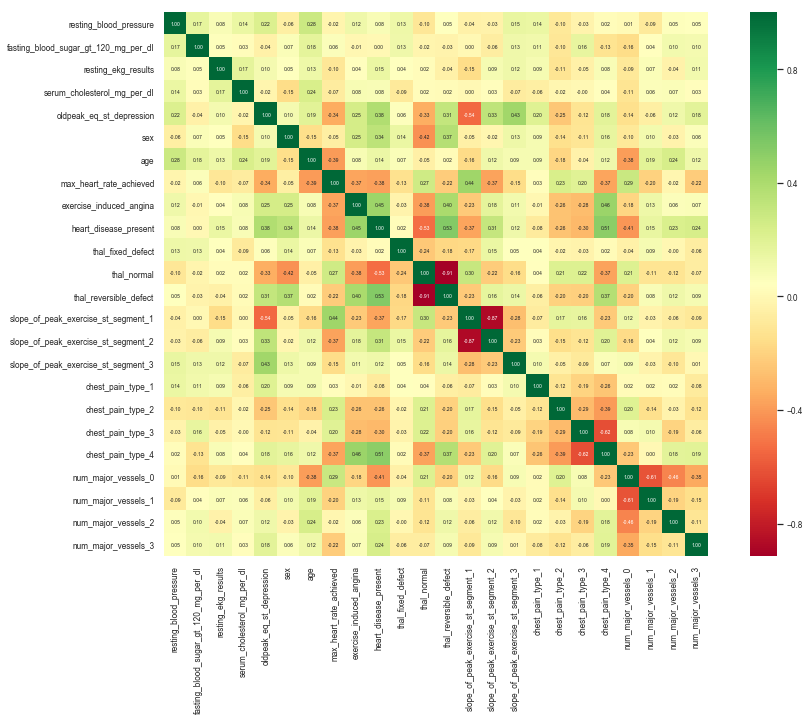

In [41]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.75)
sns.heatmap(df_combine[:len_train][features_corr].corr(), square=True, cmap='RdYlGn',annot=True,annot_kws={'size': 5},fmt='.2f')

###### drop most related features

In [42]:
df_combine.drop(columns = ['thal_normal','resting_blood_pressure'], inplace = True)
df_combine.head()

,patient_id,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,...,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3
0,0z64un,0,2,308,0.0,1,45,170,0,0.0,...,0,0,0,1,0,0,1,0,0,0
1,ryoo3j,0,0,214,1.6,0,54,158,0,0.0,...,1,0,0,0,1,0,1,0,0,0
2,yt1s1x,0,2,304,0.0,1,77,162,1,1.0,...,0,0,0,0,0,1,0,0,0,1
3,l2xjde,0,0,223,0.0,1,40,181,0,1.0,...,0,0,0,0,0,1,1,0,0,0
4,oyt4ek,0,2,270,4.2,1,59,145,0,0.0,...,0,1,1,0,0,0,1,0,0,0


Anomanar datasets per model prediction

In [43]:
df_train_final = df_combine[:len_train]
df_test_final = df_combine[len_train:]

# Model and prediction

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, classification_report, roc_auc_score, roc_curve, make_scorer, f1_score

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, KFold

# Since the dataset is class-balanced, we can use macro averaging for the F1 scorer
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [45]:
# Extract training data and labels
train_set = df_train_final.drop(columns = ['patient_id','heart_disease_present'])
test_set = df_test_final.drop(columns = ['patient_id','heart_disease_present'])
test_ids = df_test_final['patient_id'].values
train_labels = np.asarray(df_train_final['heart_disease_present'])

[num_examples,num_feat] = train_set.shape

# Submission base which is used for making submissions to the competition
submission_base = df_combine[len_train:][['patient_id']].copy()

print(train_set.shape)
print(test_set.shape)
print(train_labels.shape)

(180, 21)
(90, 21)
(180,)


In [46]:
# Using stratified kfold cross validation
nfolds = 10
strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)

##### Routine to train a model with cross-validation and append the results to a dataframe

In [47]:
model_results = pd.DataFrame(columns = ['model','cv_scores'])

def run_cv_model_f1(model, train_set, train_labels, name, model_results = None):
    
    cv_scores = cross_val_score(model, train_set, train_labels, cv=strkfold, scoring=scorer)
    
    print(f'{strkfold.n_splits}-Fold Cross Validation F1 Score = \
            {round(cv_scores.mean(), 4)} with std = {round(cv_scores.std(), 4)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model':name,'cv_scores':cv_scores}),ignore_index=True)
    return model_results

In [48]:
model_logloss = pd.DataFrame(columns = ['model','Neglogloss_scores'])

def run_cv_model_logloss(model, train_set, train_labels, name, model_logloss = None):
    
    cv_scores = cross_val_score(model, train_set, train_labels, cv=strkfold, scoring='neg_log_loss')
    
    print(f'{strkfold.n_splits}-Fold Cross Validation Neg Log Loss = \
            {round(-1*(cv_scores.mean()), 4)} with std = {round(cv_scores.std(), 4)}')
    
    if model_logloss is not None:
        model_logloss = model_logloss.append(pd.DataFrame({'model':name,'Neglogloss_scores':-1*(cv_scores)}),ignore_index=True)
    return model_logloss

##### Routine to plot feature importances

In [49]:
def plot_feature_importance (df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 10.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of x will show the most important features needed to reach 100*x% of cumulative importance
    
    """ 
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance']/df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    # Bar plot of n most important features
    trace0 = go.Bar(y = df.loc[:n, 'feature'],\
                   x = df.loc[:n, 'importance_normalized'],\
                   marker = dict(color = 'rgba(50, 171, 96, 0.6)',\
                                line = dict(color = 'rgba(50, 171, 96, 1.0)',\
                                           width = 1),),\
                    orientation = 'h')
    
    layout = go.Layout(title = 'Normalized importance of features',\
                      yaxis = dict(autorange = 'reversed',\
                                  tickangle = 0,\
                                  automargin = True),\
                      width = 800)
    
    fig = go.Figure(data = [trace0], layout = layout)
    
    plotly.offline.iplot(fig, filename='norm-importance')
    
    if threshold:
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Cumulative importance plot
        trace0 = go.Scatter(x = df.index,\
                           y = df['cumulative_importance'],\
                           line = dict(color = 'blue'))
        trace1 = go.Scatter(x = [importance_index + 1, importance_index + 1],\
                           y = [0, 1.02],\
                           line = dict(color = 'red',\
                                      dash = 'dash'))
        
        fig1 = go.Figure(data = [trace0, trace1])
        fig1['layout'].update(title = 'Cumulative Feature Importance',\
                             xaxis = dict(title = 'Number of Features'),\
                             yaxis = dict(title = 'Cumulative Importance'),\
                             showlegend = False)
        
        plotly.offline.iplot(fig1, filename='basic-line')
        
        print(f'{importance_index + 1} features required for {100 * threshold}% of cumulative importance.')
    
    return df    

##### Routine to plot scores of model_results

In [50]:
def plot_scores(model):
    #     model.set_index('model', inplace=True)
    
    trace0 = go.Bar(
                    y=model['cv_mean'],
                    x=model['model'],
                    marker=dict(
                        color='orange',
                        line=dict(
                            color='black',
                            width=1),
                    ),
                    error_y=dict(
                            type='data',
                            array=model['cv_std'],
                            visible=True,
                            color ='black')
                    )
    
    layout = go.Layout(title='F1 scores of models',
                      width=800, xaxis = dict(tickfont=dict(size=14), automargin=True))

    fig = go.Figure(data=[trace0], layout=layout)
    plotly.offline.iplot(fig, filename='F1-scores')

##### Routine to plot f1 and logloss score

In [51]:
def plot_f1_logloss(f1,logloss):
    
    "plot f1 scores"
    trace = []
    for model in f1['model'].unique():
        trace.append(go.Box(y = f1[f1['model']==model]['cv_scores'], name = model ,pointpos = 0,boxpoints = 'all'))
    
    layout = go.Layout(autosize=True, showlegend=False, xaxis = dict(tickfont=dict(size=12)), title = f"Box plot of F1 socres")

    fig = go.Figure(data=trace, layout=layout)

    plotly.offline.iplot(fig, filename="Box Plot Styling Outliers")
    
    "plot LogLoss"
    trace1 = []
    for model1 in logloss['model'].unique():
        trace1.append(go.Box(y = logloss[logloss['model']==model1]['Neglogloss_scores'], name = model1 ,pointpos = 0,boxpoints = 'all'))
    
    layout1 = go.Layout(autosize=True, showlegend=False, xaxis = dict(tickfont=dict(size=12)), title = f"Box plot of LogLoss")

    fig1 = go.Figure(data=trace1, layout=layout1)

    plotly.offline.iplot(fig1, filename="Box Plot Styling Outliers")

## Compare multiple models
Run several models for classification (without fine tuning) to determine a good baseline model that works for this dataset

In [52]:
model_logloss = pd.DataFrame(columns = ['model','Neglogloss_scores'])
model_results = pd.DataFrame(columns = ['model','cv_scores'])

In [53]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV

In [54]:
# Run SVC
model_results = run_cv_model_f1(SVC(probability=True), train_set, train_labels, 'SVC', model_results)
model_logloss = run_cv_model_logloss(SVC(probability=True), train_set, train_labels, 'SVC', model_logloss)

10-Fold Cross Validation F1 Score =             0.4123 with std = 0.08
10-Fold Cross Validation Neg Log Loss =             0.6964 with std = 0.0167


In [55]:
# Run Random Forest Classifier
model_results = run_cv_model_f1(RandomForestClassifier(n_estimators = 100, random_state = 10, n_jobs = -1), train_set, train_labels, 'RF', model_results)
model_logloss = run_cv_model_logloss(RandomForestClassifier(n_estimators = 100, random_state = 10, n_jobs = -1), train_set, train_labels, 'RF', model_logloss)

10-Fold Cross Validation F1 Score =             0.8026 with std = 0.1293
10-Fold Cross Validation Neg Log Loss =             0.4297 with std = 0.132


In [56]:
# Run  LDA
model_results = run_cv_model_f1(LinearDiscriminantAnalysis(), train_set, train_labels, 'LDA', model_results)
model_logloss = run_cv_model_logloss(LinearDiscriminantAnalysis(), train_set, train_labels, 'LDA', model_logloss)

10-Fold Cross Validation F1 Score =             0.8352 with std = 0.0696
10-Fold Cross Validation Neg Log Loss =             0.4781 with std = 0.2837


In [57]:
# Run  Logistic Regression
model_results = run_cv_model_f1(LogisticRegressionCV(), train_set, train_labels, 'LR', model_results)
model_logloss = run_cv_model_logloss(LogisticRegressionCV(), train_set, train_labels, 'LR', model_logloss)

10-Fold Cross Validation F1 Score =             0.817 with std = 0.0972
10-Fold Cross Validation Neg Log Loss =             0.4413 with std = 0.1919


In [58]:
# Run  KNN
kn = [3, 5, 10, 20]
for n in kn:
    model_results = run_cv_model_f1(KNeighborsClassifier(n_neighbors=n),
                                 train_set, train_labels, f'KNN-{n}', model_results)
    model_logloss = run_cv_model_logloss(KNeighborsClassifier(n_neighbors=n),
                                 train_set, train_labels, f'KNN-{n}', model_logloss)

10-Fold Cross Validation F1 Score =             0.6137 with std = 0.1121
10-Fold Cross Validation Neg Log Loss =             5.0459 with std = 3.3033
10-Fold Cross Validation F1 Score =             0.5395 with std = 0.0794
10-Fold Cross Validation Neg Log Loss =             1.9471 with std = 1.2177
10-Fold Cross Validation F1 Score =             0.5484 with std = 0.0911
10-Fold Cross Validation Neg Log Loss =             1.0565 with std = 0.7771
10-Fold Cross Validation F1 Score =             0.5778 with std = 0.1173
10-Fold Cross Validation Neg Log Loss =             0.6567 with std = 0.0757


In [59]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


model_results = run_cv_model_f1(XGBClassifier(colsample_bytree=0.1,n_estimators=500, reg_lambda=1, learning_rate=0.08, min_child_weight = 2, max_depth = 8, gamma=2, subsample=.2,scale_pos_weight = 1, eval_metric='logloss',reg_alpha=0.00001), train_set, train_labels, 'XGB', model_results)
model_logloss = run_cv_model_logloss(XGBClassifier(colsample_bytree=0.1,n_estimators=500, reg_lambda=1, learning_rate=0.08, min_child_weight = 2, max_depth = 8, gamma=2, subsample=.2,scale_pos_weight = 1, eval_metric='logloss',reg_alpha=0.00001), train_set, train_labels, 'XGB', model_logloss)

10-Fold Cross Validation F1 Score =             0.8115 with std = 0.1053
10-Fold Cross Validation Neg Log Loss =             0.4195 with std = 0.1078


In [60]:
# LinearSVC
clf_SVC = CalibratedClassifierCV(LinearSVC(penalty="l1", dual=False))
model_results = run_cv_model_f1(clf_SVC, train_set, train_labels, 'LinearSVC', model_results)
model_logloss = run_cv_model_logloss(clf_SVC, train_set, train_labels, 'LinearSVC', model_logloss)

10-Fold Cross Validation F1 Score =             0.8193 with std = 0.0919
10-Fold Cross Validation Neg Log Loss =             0.4502 with std = 0.0854


In [61]:
plot_f1_logloss(model_results,model_logloss)

In [62]:
model_final = model_results.merge(model_logloss, on = 'model')
model_final.groupby('model').mean().sort_values(by = 'Neglogloss_scores')

,cv_scores,Neglogloss_scores
model,,
XGB,0.811531,0.419503
RF,0.802601,0.429687
LR,0.816993,0.441333
LinearSVC,0.819273,0.450248
LDA,0.835195,0.478087
KNN-20,0.577775,0.656674
SVC,0.412254,0.696368
KNN-10,0.548412,1.056464
KNN-5,0.539463,1.947082


## Feature Engineering

##### RFECV feature selection

In [63]:
#from sklearn.feature_selection import RFECV
#features_selection = np.array(train_set.columns)
#estimator = XGBClassifier(colsample_bytree=0.1,n_estimators=500, reg_lambda=1, learning_rate=0.08, min_child_weight = 2, max_depth = 8, gamma=2, subsample=.2,scale_pos_weight = 1, eval_metric='logloss',reg_alpha=0.00001)
#selector = RFECV(estimator, step = 1, cv = strkfold, scoring= scorer, n_jobs = -1)

In [64]:
#selector = selector.fit(train_set, train_labels)

In [65]:
#features_selected = [feat for (i,feat) in enumerate(features_selection) if selector.ranking_[i]==1]

In [66]:
#train_set = train_set[features_selected]
#test_set = test_set[features_selected]

##### Preprocessing with pipeline

In [67]:
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, Normalizer, StandardScaler

pipeline = Pipeline([('logtransform',FunctionTransformer(np.log1p, validate=True)),\
                     ('polynomialFeatures', PolynomialFeatures(include_bias=True, degree = 2))])

In [68]:
train_set_PF = pipeline.fit_transform(train_set)
test_set_PF = pipeline.fit_transform(test_set)

## Validation

In [69]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [70]:
# split data into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(train_set_PF, train_labels, test_size=0.2, random_state=10)

##### Feature Selection with XGB

In [71]:
model_selection = XGBClassifier(colsample_bytree=0.1,n_estimators=500, reg_lambda=1, learning_rate=0.08, min_child_weight = 2, max_depth = 8, gamma=2, subsample=.2,scale_pos_weight = 1, eval_metric='logloss',reg_alpha=0.00001)
kfold = KFold(n_splits=10, random_state=7)

In [72]:
# select features using threshold
model_selection.fit(X_train,y_train)
selection = SelectFromModel(model_selection, threshold=0.01, prefit=True)
select_X_train = selection.transform(X_train)

##### Prediction with LogisticRegression

In [73]:
# train model
model_predict =  LogisticRegression()
model_predict.fit(select_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
# eval model
select_X_valid = selection.transform(X_valid)
y_pred = model_predict.predict(select_X_valid)
y_proba = model_predict.predict_proba(select_X_valid)

In [75]:
#logloss
from sklearn.metrics import accuracy_score, log_loss

#accuracy = accuracy_score(y_valid, y_pred)
#print(accuracy)

#logi = log_loss(y_valid, y_proba)
#print(logi)

In [76]:
valid_preds = model_predict.predict_proba(select_X_valid)
preds_df = pd.DataFrame(valid_preds, columns = targets)

preds_df['prediction'] = preds_df[targets].idxmax(axis = 1)
preds_df['confidence'] = preds_df[targets].max(axis = 1)

In [77]:
print('Accuracy score:', round(accuracy_score(y_valid, preds_df['prediction']), 5))
print('logloss score:', round(log_loss(y_valid,  preds_df[[0,1]]), 5))

Accuracy score: 0.86111
logloss score: 0.30214


###### plot confussion matrix

In [78]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

Confusion matrix, without normalization


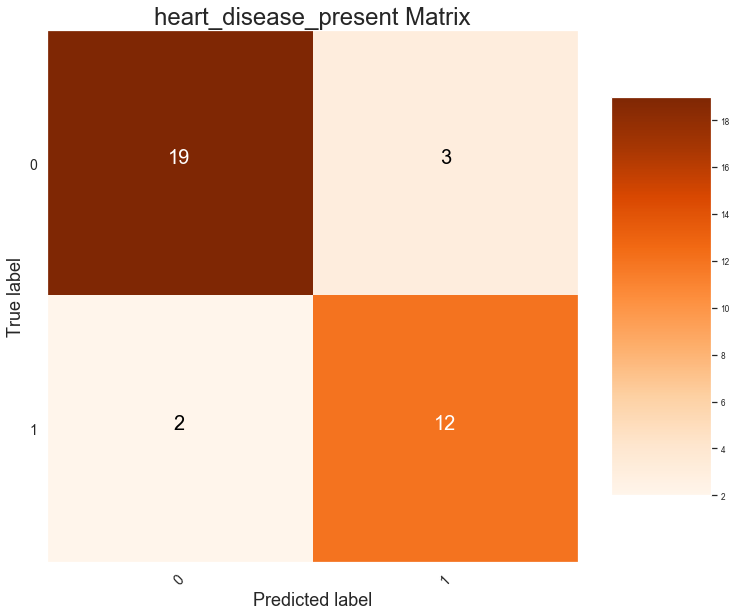

In [79]:
plot_confusion_matrix(cm, classes = targets, title = 'heart_disease_present Matrix')

In [80]:
cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

for i in range(len(targets)):
    for j in range(len(targets)):
        if cm_norm[i,j] > 0.1 and i!=j:
            print(f'Model predicts heart disease {j} instead of heart disease {i} on {cm[i,j]} ({cm_norm[i,j]:.2}%) examples')

Model predicts heart disease 1 instead of heart disease 0 on 3 (0.14%) examples
Model predicts heart disease 0 instead of heart disease 1 on 2 (0.14%) examples


## Analysis of best model so far

#### LR and feature selection

In [81]:
model_final = LogisticRegression()

In [82]:
# select features using threshold
model_selection.fit(train_set_PF, train_labels)
selection = SelectFromModel(model_selection, threshold=0.01, prefit=True)
select_train_set = selection.transform(train_set_PF)

In [83]:
model_final.fit(select_train_set, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
predictions = pd.DataFrame()

select_test_set = selection.transform(test_set_PF)

# Make predictions from the fold as probabilities
probabilites = model_final.predict_proba(select_test_set)

# Record each prediction for each class as a separate column
for j in range(len(targets)):
    predictions[j] = probabilites[:,j]
    
# Add needed information for predictions 
predictions['patient_id'] = test_ids

# Find the class and associated probability
predictions['heart_disease_present'] = predictions[targets].idxmax(axis = 1)
predictions['confidence'] = predictions[targets].max(axis = 1)

In [85]:
predictions.head()

,0,1,patient_id,heart_disease_present,confidence
0,0.589290,0.410710,olalu7,0,0.589290
1,0.940070,0.059930,z9n6mx,0,0.940070
2,0.035096,0.964904,5k4413,1,0.964904
3,0.936101,0.063899,mrg7q5,0,0.936101
4,0.018528,0.981472,uki4do,1,0.981472


##### Investigate distribution of labels in train and test

In [86]:
trace0 = go.Bar(x = targets, y = df_final['heart_disease_present'].value_counts()/num_train, name = 'train',
                marker=dict(
                        color='orange',
                        line=dict(
                            color='black',
                            width=1),
                    ))
trace1 = go.Bar(x = targets, y = predictions['heart_disease_present'].value_counts()/num_test, name = 'predicted',
               marker=dict(
                        color='blue',
                        line=dict(
                            color='black',
                            width=1),
                    ))

    
layout = go.Layout(title='Label distribution in train and test (predicted)',
                      width=800, xaxis = dict(tickfont=dict(size=14), automargin=True),
                   yaxis = dict(title='Frequencies'))

fig = go.Figure(data=[trace0, trace1], layout=layout)
plotly.offline.iplot(fig, filename='label-dist')

##### Submission

In [87]:
submission = submission_base.merge(predictions, on = 'patient_id', how = 'left')

In [88]:
submission = submission.drop(columns =[0,'heart_disease_present','confidence'])

In [89]:
submission = submission.rename(columns = {1:'heart_disease_present'})

In [90]:
submission.head()

,patient_id,heart_disease_present
0,olalu7,0.410710
1,z9n6mx,0.059930
2,5k4413,0.964904
3,mrg7q5,0.063899
4,uki4do,0.981472


In [91]:
submission.to_csv('Arnau_submission.csv',index=False)